In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import learning_curve, RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve

In [ ]:
X, y = fetch_openml('mnist_784', return_X_y=True)

In [ ]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
indices = np.arange(y_train.shape[0])
np.random.shuffle(indices)
X_train, y_train = X_train[indices], y_train[indices]

In [ ]:
mlp = MLPClassifier(
                    random_state=1,
                    hidden_layer_sizes = (258,),
                    activation = 'relu',
                    solver = 'adam',
                    learning_rate_init = 0.0001,
                    alpha = 2.22,
                    n_iter_no_change = 25,
                    max_iter=500,
                    )

In [ ]:
train_scores, valid_scores = validation_curve(mlp, X_train, y_train, "alpha", np.logspace(-4, 1, 8), cv=5, n_jobs=-1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  40 | elapsed: 65.7min remaining: 136.5min
[Parallel(n_jobs=-1)]: Done  27 out of  40 | elapsed: 134.2min remaining: 64.6min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 210.8min finished


In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

In [ ]:
reg_range = np.logspace(-4, 4, 8)

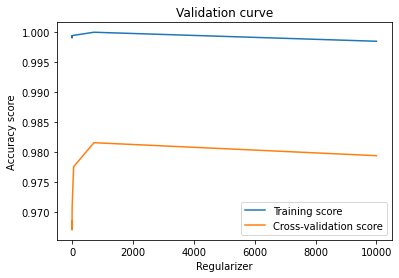

In [ ]:
plt.plot(reg_range, train_scores_mean, label='Training score')
plt.plot(reg_range, valid_scores_mean, label='Cross-validation score')
plt.title('Validation curve')
plt.xlabel('Regularizer')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()